In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import numpy.linalg as linalg

# Gyroscope Calibration

In [2]:
gyr_data = np.genfromtxt(fname='gyro2.csv', usecols=range(1, 17), delimiter=",", names=True)
gyr_x = np.linspace(0, np.shape(gyr_data)[0], np.shape(gyr_data)[0])
print("Samples: {}".format(np.shape(gyr_data)[0]))

Samples: 2182


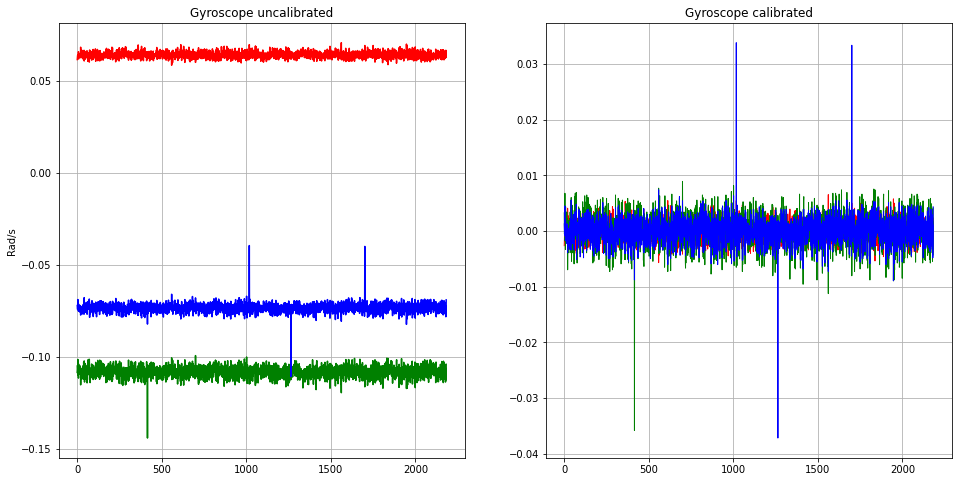

In [3]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # a figure with a single Axes
ax1.set_title("Gyroscope uncalibrated")
ax1.grid(True);
ax1.plot(gyr_x, gyr_data["gx"], color='r');
ax1.plot(gyr_x, gyr_data["gy"], color='g');
ax1.plot(gyr_x, gyr_data["gz"], color='b');
ax1.set(ylabel='Rad/s')

gyr_cal = np.array([np.mean(gyr_data["gx"]), np.mean(gyr_data["gy"]), np.mean(gyr_data["gz"])]).round(4)

ax2.set_title("Gyroscope calibrated")
ax2.grid(True);
ax2.plot(gyr_x, gyr_data["gx"] - gyr_cal[0], color='r', linewidth=1, linestyle='-');
ax2.plot(gyr_x, gyr_data["gy"] - gyr_cal[1], color='g', linewidth=1, linestyle='-');
ax2.plot(gyr_x, gyr_data["gz"] - gyr_cal[2], color='b', linewidth=1, linestyle='-');

In [4]:
print("Gyroscope Calibration Data [rad/s]: " + str(gyr_cal))

Gyroscope Calibration Data [rad/s]: [ 0.064  -0.1082 -0.0734]


# Accelerometer Calibration (Single Axis, Az)

In [71]:
acc_ranges = np.r_[:250, 400:550, 600:700]
acc_data = np.genfromtxt(fname='acc2.csv', usecols=range(1, 17), delimiter=",", names=True)[acc_ranges]
acc_x = np.linspace(0, np.shape(acc_data)[0], np.shape(acc_data)[0])
print("Samples: {}".format(np.shape(acc_data)[0]))

Samples: 500


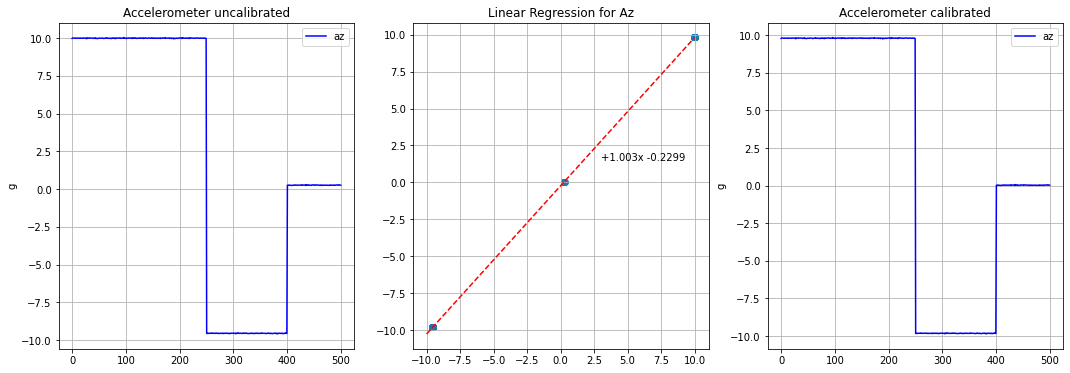

In [72]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # a figure with a single Axes
ax1.set_title("Accelerometer uncalibrated")
ax1.grid(True);
#ax1.plot(acc_x, acc_data["ax"], color='r', label='ax');
#ax1.plot(acc_x, acc_data["ay"], color='g', label='ay');
ax1.plot(acc_x, acc_data["az"], color='b', label='az');
ax1.set(ylabel='g')
ax1.legend()

acc_ref = np.concatenate((np.full(250, 9.81), np.full(150, -9.81), np.full(100, 0)))

acc_res = stats.linregress(acc_data["az"], acc_ref)

ax2.set_title("Linear Regression for Az")
ax2.grid(True);
ax2.scatter(acc_data["az"], acc_ref)
ax2.plot(np.linspace(-10, 10, 10), acc_res.intercept + acc_res.slope*np.linspace(-10, 10, 10), "r--")
ax2.annotate('{:+.4}x {:+.4}'.format(acc_res.slope, acc_res.intercept), xy=(2, 1), xytext=(3, 1.5))

ax3.set_title("Accelerometer calibrated")
ax3.grid(True);
ax3.plot(acc_x, acc_data["az"]*acc_res.slope + acc_res.intercept, color='b', label='az');
ax3.set(ylabel='g')
ax3.legend();

In [75]:
print("Accelerometer Calibration Data: [{:+.4}, {:+.4}]".format(acc_res.slope, acc_res.intercept))

Accelerometer Calibration Data: [+1.003, -0.2299]


# Accelerometer Calibration (All Axes)

In [82]:
acc_data = np.genfromtxt(fname='acc4.csv', usecols=range(1, 17), delimiter=",", names=True)
acc_x = np.linspace(0, np.shape(acc_data)[0], np.shape(acc_data)[0])
print("Samples: {}".format(np.shape(acc_data)[0]))

Samples: 1690


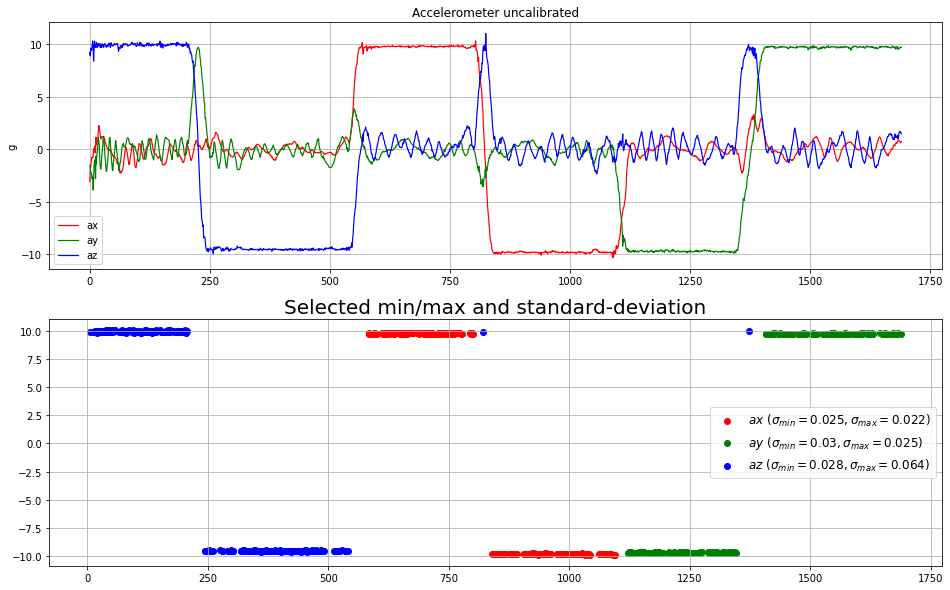

In [83]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))  # a figure with a single Axes
ax1.set_title("Accelerometer uncalibrated")
ax1.grid(True);
ax1.plot(acc_x, acc_data["ax"], color='red', linewidth=1.2, linestyle='-', label='ax');
ax1.plot(acc_x, acc_data["ay"], color='green', linewidth=1.2, linestyle='-', label='ay');
ax1.plot(acc_x, acc_data["az"], color='blue', linewidth=1.2, linestyle='-', label='az');
ax1.set(ylabel='g')
ax1.legend();

# select the top n samples but discard 10% with the largest value as they might be outlier
n_top = 150;
n_drop = int(n_top * 0.1);

acc_ax_max = np.argsort(acc_data["ax"])[-n_top:-n_drop]
acc_ax_min = np.argsort(acc_data["ax"])[n_drop:n_top]

acc_ay_max = np.argsort(acc_data["ay"])[-n_top:-n_drop]
acc_ay_min = np.argsort(acc_data["ay"])[n_drop:n_top]

acc_az_max = np.argsort(acc_data["az"])[-n_top:-n_drop]
acc_az_min = np.argsort(acc_data["az"])[n_drop:n_top]

ax2.set_title("Selected min/max and standard-deviation", fontsize=20)
ax2.grid(True);
ax2.scatter(acc_x[acc_ax_min], acc_data["ax"][acc_ax_min], color='r', label=r'$ax\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(acc_data["ax"][acc_ax_min]), np.std(acc_data["ax"][acc_ax_max])));
ax2.scatter(acc_x[acc_ax_max], acc_data["ax"][acc_ax_max], color='r');
ax2.scatter(acc_x[acc_ay_min], acc_data["ay"][acc_ay_min], color='g', label=r'$ay\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(acc_data["ay"][acc_ay_min]), np.std(acc_data["ay"][acc_ay_max])));
ax2.scatter(acc_x[acc_ay_max], acc_data["ay"][acc_ay_max], color='g');
ax2.scatter(acc_x[acc_az_min], acc_data["az"][acc_az_min], color='b', label=r'$az\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(acc_data["az"][acc_az_min]), np.std(acc_data["az"][acc_az_max])));
ax2.scatter(acc_x[acc_az_max], acc_data["az"][acc_az_max], color='b');

acc_ax_max_avg = np.mean(acc_data["ax"][acc_ax_max])
acc_ax_min_avg = np.mean(acc_data["ax"][acc_ax_min])
#ax2.plot([0, np.shape(acc_data)[0]], [acc_ax_min_avg, acc_ax_min_avg], "r-")
#ax2.plot([0, np.shape(acc_data)[0]], [acc_ax_max_avg, acc_ax_max_avg], "r-")

acc_ay_max_avg = np.mean(acc_data["ay"][acc_ay_max])
acc_ay_min_avg = np.mean(acc_data["ay"][acc_ay_min])
#ax2.plot([0, np.shape(acc_data)[0]], [acc_ay_min_avg, acc_ay_min_avg], "g--")
#ax2.plot([0, np.shape(acc_data)[0]], [acc_ay_max_avg, acc_ay_max_avg], "g--")

acc_az_max_avg = np.mean(acc_data["az"][acc_az_max])
acc_az_min_avg = np.mean(acc_data["az"][acc_az_min])
#ax2.plot([0, np.shape(acc_data)[0]], [acc_az_min_avg, acc_az_min_avg], "b:")
#ax2.plot([0, np.shape(acc_data)[0]], [acc_az_max_avg, acc_az_max_avg], "b:")
ax2.legend(loc='center right', fontsize=12);

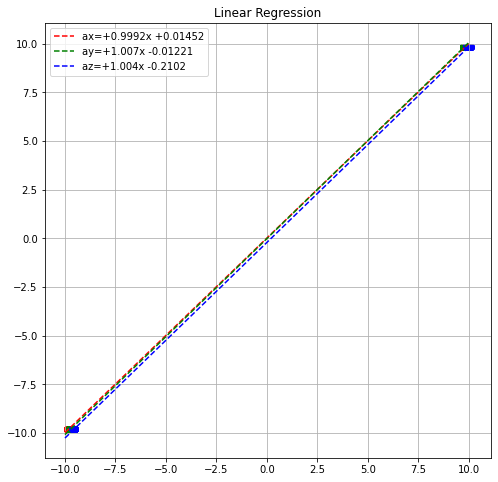

In [84]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 8))  # a figure with a single Axes
ax.set_title("Linear Regression")
ax.grid(True);

acc_a_ref = np.concatenate((np.full(n_top-n_drop, -9.81), np.full(n_top-n_drop, 9.81)))
acc_ax_res = stats.linregress(np.concatenate((acc_data["ax"][acc_ax_min], acc_data["ax"][acc_ax_max])), acc_a_ref)
acc_ay_res = stats.linregress(np.concatenate((acc_data["ay"][acc_ay_min], acc_data["ay"][acc_ay_max])), acc_a_ref)
acc_az_res = stats.linregress(np.concatenate((acc_data["az"][acc_az_min], acc_data["az"][acc_az_max])), acc_a_ref)

ax.scatter(np.concatenate((acc_data["ax"][acc_ax_min], acc_data["ax"][acc_ax_max])), acc_a_ref, color='r');
ax.plot(np.linspace(-10, 10, 10), acc_ax_res.intercept + acc_ax_res.slope*np.linspace(-10, 10, 10), "r--", label='ax={:+.4}x {:+.4}'.format(acc_ax_res.slope, acc_ax_res.intercept))

ax.scatter(np.concatenate((acc_data["ay"][acc_ay_min], acc_data["ay"][acc_ay_max])), acc_a_ref, color='g');
ax.plot(np.linspace(-10, 10, 10), acc_ay_res.intercept + acc_ay_res.slope*np.linspace(-10, 10, 10), "g--", label='ay={:+.4}x {:+.4}'.format(acc_ay_res.slope, acc_ay_res.intercept))

ax.scatter(np.concatenate((acc_data["az"][acc_az_min], acc_data["az"][acc_az_max])), acc_a_ref, color='b');
ax.plot(np.linspace(-10, 10, 10), acc_az_res.intercept + acc_az_res.slope*np.linspace(-10, 10, 10), "b--", label='az={:+.4}x {:+.4}'.format(acc_az_res.slope, acc_az_res.intercept))

ax.legend();

# Magnetometer Calibration (Hard Iron)

In [34]:
mag_data = np.genfromtxt(fname='mag2.csv', usecols=range(1, 17), delimiter=",", names=True)
mag_data["mx"] = mag_data["mx"];
mag_data["my"] = mag_data["my"];
mag_data["mz"] = mag_data["mz"];
mag_x = np.linspace(0, np.shape(mag_data)[0], np.shape(mag_data)[0])
print("Samples: {}".format(np.shape(mag_data)[0]))

Samples: 2198


In [35]:
# from https://stackoverflow.com/questions/26574945/how-to-find-the-center-of-circle-using-the-least-square-fit-in-python
def nsphere_fit(x):
    n = x.shape[-1]
    x = x.reshape(-1, n)
    m = x.shape[0]

    B = np.empty((m, n + 1), dtype=x.dtype)
    X = B[:, :-1]
    X[:] = x
    B[:, -1] = 1

    d = np.square(X).sum(axis=-1)
    y, *_ = linalg.lstsq(B, d, rcond=None)
    c = 0.5 * y[:-1]
    r = np.sqrt(y[-1] + np.square(c).sum())
    return r, c

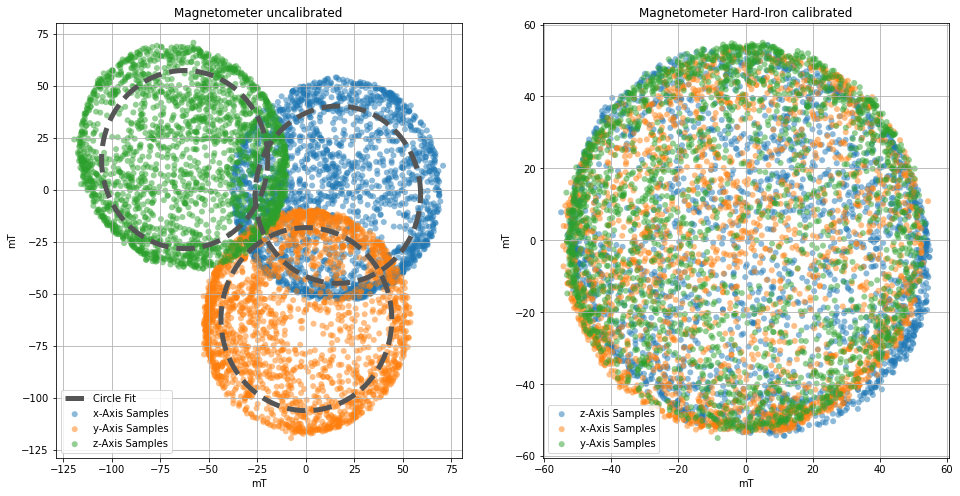

In [36]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # a figure with a single Axes
ax1.set_title("Magnetometer uncalibrated")
ax1.grid(True);
ax1.scatter(mag_data["my"], mag_data["mz"], alpha=0.5, edgecolor='none', label='x-Axis Samples');
ax1.scatter(mag_data["mz"], mag_data["mx"], alpha=0.5, edgecolor='none', label='y-Axis Samples');
ax1.scatter(mag_data["mx"], mag_data["my"], alpha=0.5, edgecolor='none', label='z-Axis Samples');
ax1.set(xlabel='mT')
ax1.set(ylabel='mT')
ax1.legend();

mag_x_avg = (np.max(mag_data["mx"]) + np.min(mag_data["mx"]))/2
mag_y_avg = (np.max(mag_data["my"]) + np.min(mag_data["my"]))/2
mag_z_avg = (np.max(mag_data["mz"]) + np.min(mag_data["mz"]))/2

ax2.set_title("Magnetometer Hard-Iron calibrated")
ax2.grid(True);
ax2.scatter(mag_data["mx"] - mag_x_avg, mag_data["my"] - mag_y_avg, alpha=0.5, edgecolor='none', label='z-Axis Samples');
ax2.scatter(mag_data["my"] - mag_y_avg, mag_data["mz"] - mag_z_avg, alpha=0.5, edgecolor='none', label='x-Axis Samples');
ax2.scatter(mag_data["mz"] - mag_z_avg, mag_data["mx"] - mag_x_avg, alpha=0.5, edgecolor='none', label='y-Axis Samples');
ax2.set(xlabel='mT')
ax2.set(ylabel='mT')
ax2.legend();

mag_z_r, mag_z_c = nsphere_fit(np.array([mag_data["mx"], mag_data["my"]]).T)
mag_x_r, mag_x_c = nsphere_fit(np.array([mag_data["my"], mag_data["mz"]]).T)
mag_y_r, mag_y_c = nsphere_fit(np.array([mag_data["mz"], mag_data["mx"]]).T)

mag_avg2 = [(mag_z_c[0] + mag_y_c[1]) / 2, (mag_z_c[1] + mag_x_c[0]) / 2, (mag_y_c[0] + mag_x_c[1]) / 2]

t = np.linspace(0, 2 * np.pi, 100, endpoint=True)
ax1.plot(mag_x_r * np.cos(t) + mag_x_c[0], mag_x_r * np.sin(t) + mag_x_c[1], color='#555', linewidth=5, linestyle='--', label='Circle Fit');
ax1.plot(mag_y_r * np.cos(t) + mag_y_c[0], mag_y_r * np.sin(t) + mag_y_c[1], color='#555', linewidth=5, linestyle='--');
ax1.plot(mag_z_r * np.cos(t) + mag_z_c[0], mag_z_r * np.sin(t) + mag_z_c[1], color='#555', linewidth=5, linestyle='--');
ax1.legend();

In [37]:
print("Hard-Iron Offsets via min/max: [{:.3f}, {:.3f}, {:.3f}]".format(mag_x_avg, mag_y_avg, mag_z_avg))

Hard-Iron Offsets via min/max: [-64.418, 16.450, 0.738]


In [38]:
print("Hard-Iron Offsets via Circle Fit: [{:.3f}, {:.3f}, {:.3f}]".format(mag_avg2[0], mag_avg2[1], mag_avg2[2]))

Hard-Iron Offsets via Circle Fit: [-62.284, 15.581, -0.989]


# Magnetometer Calibration (Hard- and Soft-Iron)

In [10]:
# from https://stackoverflow.com/questions/7819498/plotting-ellipsoid-with-matplotlib
def plot_ellipsoid_and_measurements(A, radius, c, xm, ym, zm):
    # find the rotation matrix and radii of the axes
    U, s, rotation = linalg.svd(A)
    radii = 1.0/np.sqrt(s) * radius

    u = np.linspace(0.0, 2.0 * np.pi, 100)
    v = np.linspace(0.0, np.pi, 100)
    x = radii[0] * np.outer(np.cos(u), np.sin(v))
    y = radii[1] * np.outer(np.sin(u), np.sin(v))
    z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
    for i in range(len(x)):
        for j in range(len(x)):
            [x[i,j],y[i,j],z[i,j]] = np.dot([x[i,j],y[i,j],z[i,j]], rotation) + c

    # plot
    fig = plt.figure(figsize=plt.figaspect(1) * 1.5) # adapt factor according your window width
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xm, ym, zm, s=10.0, c='r', alpha=0.5) # plot measurements
    ax.plot_wireframe(x, y, z,  rstride=6, cstride=6, color='b', alpha=0.5) # plot ellipsoid
    
    # scale axes equally
    max_value = max(radii[0], radii[1], radii[2], max(xm), max(ym), max(zm))
    for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-max_value, max_value))
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    #fig.tight_layout()
    plt.show()

In [39]:
# for creating a responsive plot
%matplotlib widget

A = np.array([[1,0,0],[0,1,0],[0,0,1]])
c = [0,0,0]
plot_ellipsoid_and_measurements(A, 50, c, mag_data["mx"], mag_data["my"], mag_data["mz"])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
# from https://de.mathworks.com/matlabcentral/fileexchange/24693-ellipsoid-fit
'''
Copyright (c) 2015, Yury Petrov
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in
      the documentation and/or other materials provided with the distribution

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE
LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR
CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF
SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS
INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN
CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE)
ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
POSSIBILITY OF SUCH DAMAGE.
'''

def fit_ellipsoid(x, y, z, samples):
    D = np.zeros((9,samples))
    D[0] = x * x + y * y - 2 * z * z
    D[1] = x * x + z * z - 2 * y * y
    D[2] = 2 * x * y
    D[3] = 2 * x * z
    D[4] = 2 * z * y
    D[5] = 2 * x
    D[6] = 2 * y
    D[7] = 2 * z
    D[8] = np.ones(samples)

    d2 = x * x + y * y + z * z
    u = linalg.inv(D @ D.transpose()) @ (D @ d2)

    v = np.zeros(10)
    v[0] = u[0] + u[1] - 1
    v[1] = u[0] - 2 * u[1] - 1
    v[2] = u[1] - 2 * u[0] - 1
    v[3:10] = u[2:9]
    A = np.array([[v[0], v[3], v[4], v[6]],   \
                   [v[3], v[1], v[5], v[7]], \
                   [v[4], v[5], v[2], v[8]], \
                   [v[6], v[7], v[8], v[9]]])
    center = linalg.inv(-A[0:3, 0:3]) @ v[6:9]
    T = np.identity(4)
    T[3, 0:3] = center.transpose()
    R = T @ A @ T.transpose()
    M = R[0:3, 0:3] /-R[3, 3]
    return M, center, R[3, 3]

In [40]:
x = mag_data["mx"]
y = mag_data["my"]
z = mag_data["mz"]
M, center, scale = fit_ellipsoid(x, y, z, np.shape(mag_data)[0])
plot_ellipsoid_and_measurements(M, 1, center, x, y, z)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
# hard iron
V = center
print("Hard Iron", V)

#soft iron
# attain Winv by taking the matrix square root of M
D, Y = linalg.eig(M)
Winv = Y @ np.diag(np.sqrt(D)) @ linalg.inv(Y)
W = linalg.inv(Winv)
print("Winv:\n", Winv)
print("W:\n", W)

Hard Iron [-63.46178633  16.28017555   0.38407088]
Winv:
 [[ 0.01886853  0.00091104 -0.00015506]
 [ 0.00091104  0.01879002 -0.00010716]
 [-0.00015506 -0.00010716  0.01894191]]
W:
 [[53.12600646 -2.57343512  0.4203445 ]
 [-2.57343512 53.34612668  0.28071578]
 [ 0.4203445   0.28071578 52.798009  ]]


In [42]:
def correct_measurements(measurements):
    corrected_measurements = np.copy(measurements)
    for idx, m in enumerate(measurements):
         corrected_measurements[idx][0:3] = (np.sqrt(scale) * Winv) @ (m[0:3] - center) 
    return corrected_measurements

In [43]:
corrected_measurements = correct_measurements(np.array([mag_data["mx"], mag_data["my"], mag_data["mz"]]).T)
A = np.array([[1/scale,0,0],[0,1/scale,0],[0,0,1/scale]])
c = [0,0,0]
plot_ellipsoid_and_measurements(A, 1, c, corrected_measurements[:,0] , corrected_measurements[:,1], corrected_measurements[:,2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [44]:
B = np.sqrt(scale)
print("B={0:05.2f}µT".format(B))

B=52.96µT


In [45]:
print(Winv * np.sqrt(scale))

[[ 0.99927569  0.04824861 -0.00821213]
 [ 0.04824861  0.99511757 -0.00567495]
 [-0.00821213 -0.00567495  1.00316198]]
